In [49]:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 



from sklearn.model_selection import KFold,cross_val_score, RepeatedStratifiedKFold,StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier

import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff


import warnings
warnings.filterwarnings("ignore")

In [50]:
filepath = '/Users/akshayhanchate/Downloads/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(filepath)
  
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [52]:
#there are many ways to handle missing values like using mean, median and mode. here we could have used median to replace the missing values but lets try with some unusal methods.
#i have used decision trees here. Trying to learn this new method

In [53]:
Bmi_pipeline = Pipeline( steps=[ 
                               ('scale',StandardScaler()),
                               ('lr',DecisionTreeRegressor(random_state=42))
                              ])
X = df[['age','gender','bmi']].copy()
X.gender = X.gender.replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)

Missing = X[X.bmi.isna()]
X = X[~X.bmi.isna()]
Y = X.pop('bmi')
Bmi_pipeline.fit(X,Y)
predicted_bmi = pd.Series(Bmi_pipeline.predict(Missing[['age','gender']]),index=Missing.index)
df.loc[Missing.index,'bmi'] = predicted_bmi

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [55]:
df.duplicated().sum()

0

In [56]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.879487,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.476923,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [57]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.918410,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.731841,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.700000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.300000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.900000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [58]:
#Lets check the skewness of the numerical variables, for that lets divide the data into categorical and numericals first
categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married',
'work_type', 'Residence_type', 'smoking_status']

numerical = ['age','avg_glucose_level', 'bmi']

In [59]:
df[numerical].skew()

age                 -0.137059
avg_glucose_level    1.572284
bmi                  1.047423
dtype: float64

In [60]:
#starting with Bivariate analysis, this will give us an understanding of how variables are related to target variable.
round(df[df["hypertension"]==1]["stroke"].mean()*100,2)


13.25

In [61]:
round(df[df["hypertension"]==0]["stroke"].mean()*100,2)

3.97

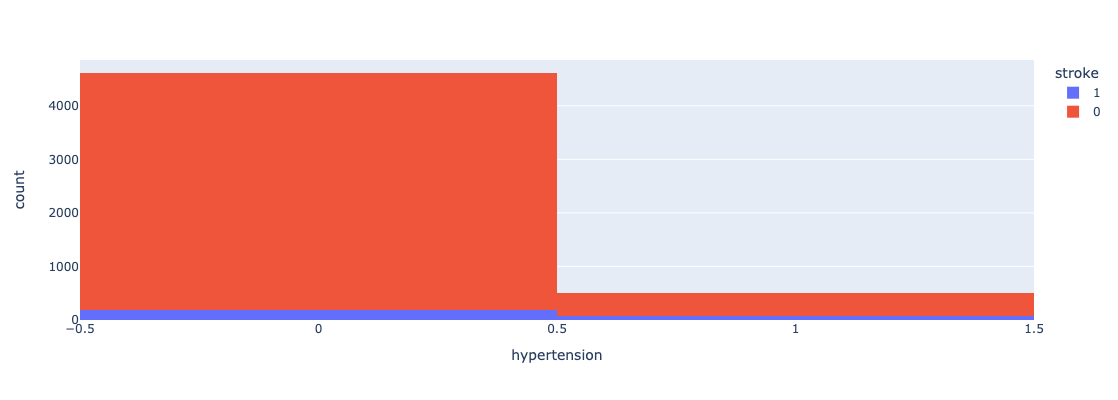

In [62]:
px.histogram(df, x="hypertension", color="stroke",width=300, height=400).show()


Hypertension compared with stroke, we can conclude that 
1. A person with Hypertension has 13.25% chances of getting stroke
2. A person without Hypertension has 3.97% chances of getting a stroke
3. This means a person with hypertension has 3x chances of getting a stroke. 

In [63]:
round(df[df["gender"]=="Female"]["stroke"].mean()*100,2)

4.71

In [64]:
round(df[df["gender"]=="Male"]["stroke"].mean()*100,2)

5.11

In [65]:

round(df[df["gender"]=="Other"]["stroke"].mean()*100,2)

0.0

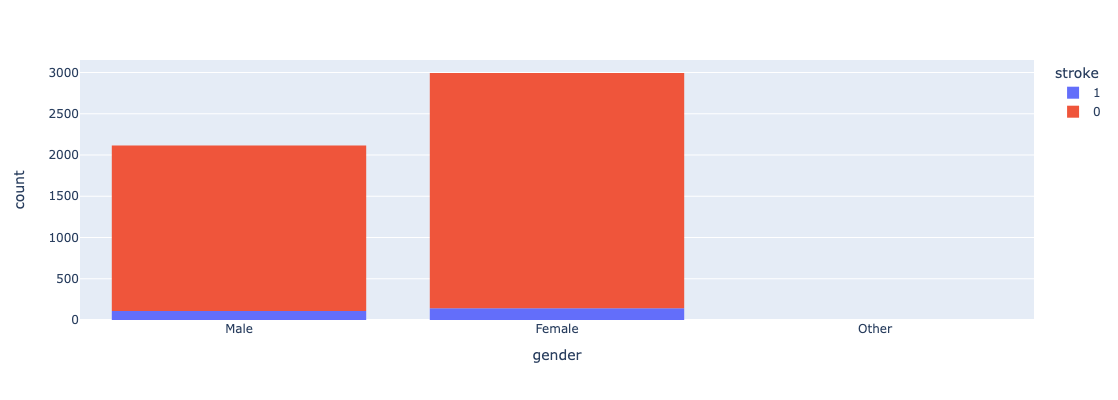

In [66]:
px.histogram(df, x="gender", color="stroke",width=300, height=400).show()

Gender wise Stroke ratio
1. A female individual is having a 4.71% chance of getting a stroke
2. A male individual is having a 5.11% chances of getting a stroke
3. Individuals in other category have 0% chance of getting a stroke(these results as per collected data, with more historical data we can get accurate results for other category)
4. To sum this up, Male indivuduals have higher chances of getting a stroke if compared to female. Though this difference is relatively small

In [67]:
round(df[df["heart_disease"]==1]["stroke"].mean()*100,2)


17.03

In [68]:
round(df[df["heart_disease"]==0]["stroke"].mean()*100,2)

4.18

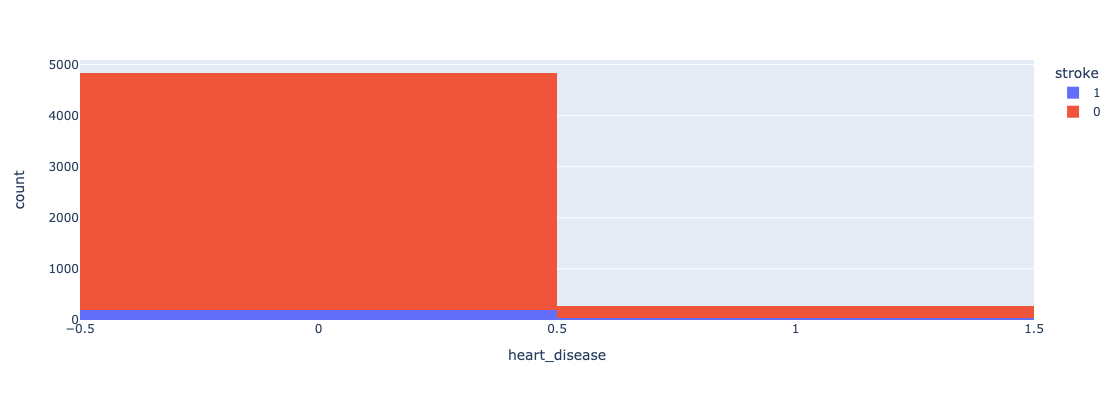

In [69]:
px.histogram(df, x="heart_disease", color="stroke",width=300, height=400).show()


Heart disease comparision with Stroke:
1. A person with heart disease has 17.03% chances of getting a stroke
2. A person without a heart disease has only 4.18% chances of getting a stroke
3. To sum this up, Person with heart diseases have 4x chances of getting a stroke

In [70]:
round(df[df["ever_married"]=="Yes"]["stroke"].mean()*100,2)

6.56

In [71]:
round(df[df["ever_married"]=="No"]["stroke"].mean()*100,2)

1.65

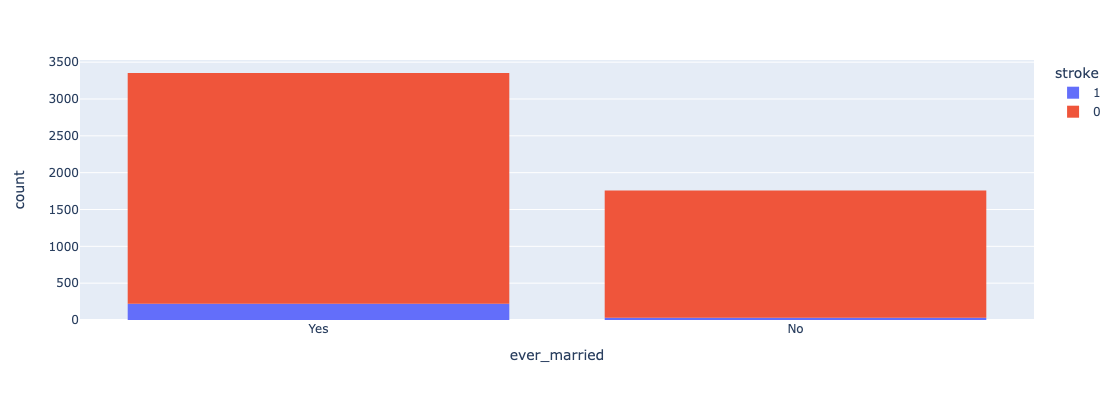

In [72]:
px.histogram(df, x="ever_married", color="stroke",width=300, height=400).show()

Marriage with respect to Stroke:
1. A Married person has 6.56% of getting a stroke
2. An Unmarried person has only a 1.65% chance of getting a stroke
3. For a Married person chances of getting a stroke increase by 5x.

In [73]:
round(df[df["work_type"]=="Private"]["stroke"].mean()*100,2)

5.09

In [74]:
round(df[df["work_type"]=="Self-employed"]["stroke"].mean()*100,2)

7.94

In [75]:
round(df[df["work_type"]=="Govt_job"]["stroke"].mean()*100,2)

5.02

In [76]:
round(df[df["work_type"]=="children"]["stroke"].mean()*100,2)

0.29

In [77]:
round(df[df["work_type"]=="Never_worked"]["stroke"].mean()*100,2)

0.0

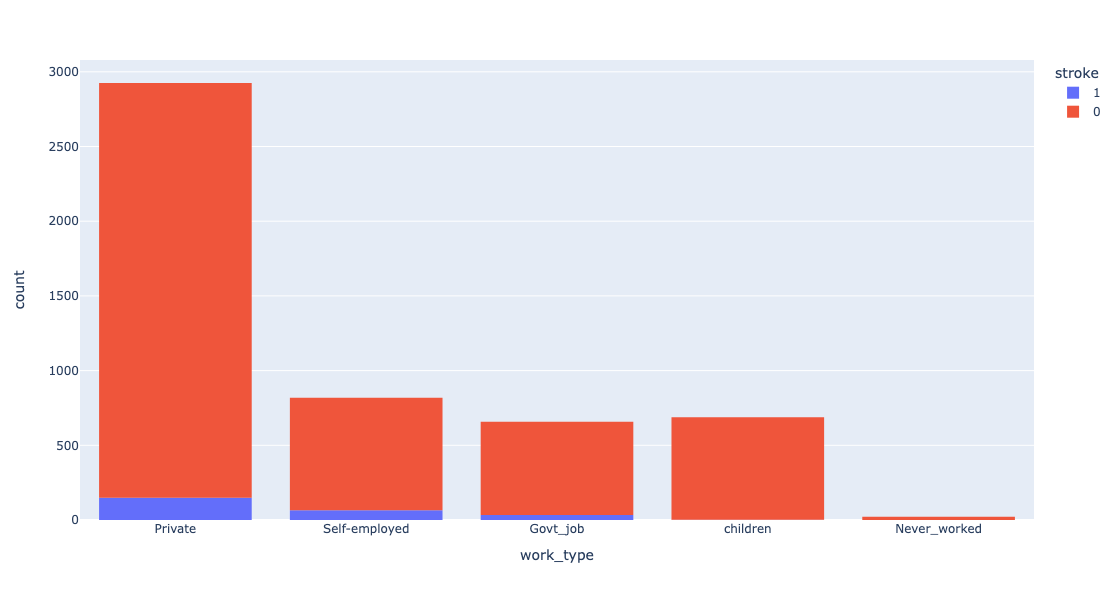

In [78]:
px.histogram(df, x="work_type", color="stroke",width=500, height=600)

Work type with respect to Stroke:
1. A person working in the Private sector has a 5.09% chance of getting a stroke
2. A person who is self-employed has a 7.49% chance of getting a stroke
3. A person working in a government job has a 5.02% chance of getting a stroke
4. Children have around a 0.29% chance of getting a stroke
5. An individual who has never worked has a 0.0 chance of getting a stroke.
According to our data, a self-employed person has more chance of getting a stroke if compared to others and an individual who has never worked before won't suffer from stroke. (This in not true. There are many more parameters which contribute to stroke)

In [79]:
round(df[df["smoking_status"]=="formerly smoked"]["stroke"].mean()*100,2)

7.91

In [80]:
round(df[df["smoking_status"]=="never smoked"]["stroke"].mean()*100,2)

4.76

In [81]:
round(df[df["smoking_status"]=="smokes"]["stroke"].mean()*100,2)

5.32

In [82]:
round(df[df["smoking_status"]=="Unknown"]["stroke"].mean()*100,2)

3.04

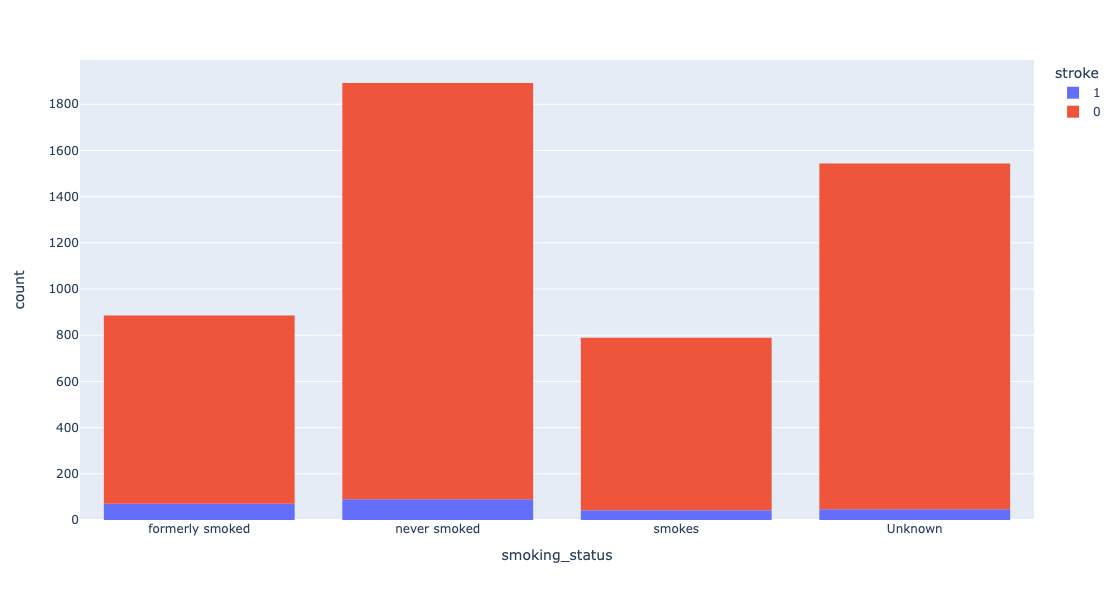

In [83]:
px.histogram(df, x="smoking_status", color="stroke",width=500, height=600)

Smoking with respect to Stroke:
1. A formerly smoked person has a 7.91% chance of getting a stroke
2. A person who has never smoked still has a 4.76% chance of getting a stroke
3. A person who is actively smoking has a 5.32% chance of getting a stroke
4. Individuals in the Unknown category have a 3.04% chance of getting a stroke
To sum this up, Smoking increases the chances of suffering from stroke

In [84]:
from sklearn.metrics import mutual_info_score
def cat_mut_inf(series):
    return mutual_info_score(series, df['stroke']) 

df_cat = df[categorical].apply(cat_mut_inf) 
df_cat = df_cat.sort_values(ascending=False).to_frame(name='mutual_info_score') 
df_cat


,mutual_info_score
ever_married,0.006950
work_type,0.006825
hypertension,0.005976
heart_disease,0.005897
smoking_status,0.002750
Residence_type,0.000120
gender,0.000051


As seen above, most of the categorical variables, have almost no effect on the target variable.

In [85]:
#lets check for multi Collinearity 

df[numerical].corr()

,age,avg_glucose_level,bmi
age,1.000000,0.238171,0.334774
avg_glucose_level,0.238171,1.000000,0.172528
bmi,0.334774,0.172528,1.000000


In [86]:
df[['age','avg_glucose_level','bmi','hypertension','heart_disease','stroke']].corr()

,age,avg_glucose_level,bmi,hypertension,heart_disease,stroke
age,1.000000,0.238171,0.334774,0.276398,0.263796,0.245257
avg_glucose_level,0.238171,1.000000,0.172528,0.174474,0.161857,0.131945
bmi,0.334774,0.172528,1.000000,0.164914,0.043624,0.041516
hypertension,0.276398,0.174474,0.164914,1.000000,0.108306,0.127904
heart_disease,0.263796,0.161857,0.043624,0.108306,1.000000,0.134914
stroke,0.245257,0.131945,0.041516,0.127904,0.134914,1.000000


(5110, 10) (5110,)
>LR 0.839 (0.029)
>LDA 0.833 (0.030)
>SVM 0.650 (0.063)


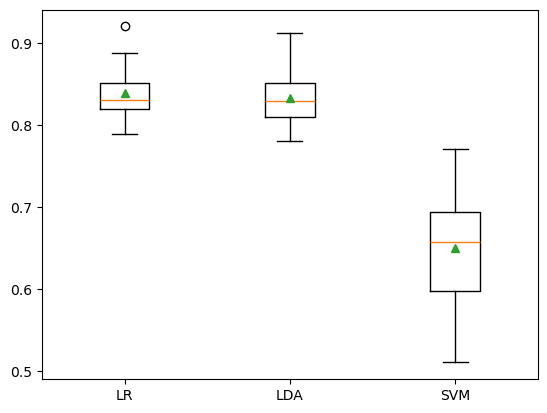

In [87]:
def load_data ():
    df = pd.read_csv('/Users/akshayhanchate/Downloads/healthcare-dataset-stroke-data.csv')
    df=df.drop('id', axis=1)
    categorical = [ 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 'smoking_status']
    numerical = ['avg_glucose_level','bmi','age']
    y= df['stroke']
    X = df.drop('stroke', axis=1)
    return X,y,categorical, numerical


def evaluate_model(X, y, model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    return scores

def get_models():
    models, names = list(), list()
    models.append(LogisticRegression(solver='liblinear'))    
    names.append('LR')
    models.append(LinearDiscriminantAnalysis())
    names.append('LDA')
    models.append(SVC(gamma='scale'))
    names.append('SVM')
    return models, names


X,y,categorical, numerical= load_data()
print(X.shape, y.shape)

models, names = get_models()
results = list()

for i in range(len(models)):
    transformer = ColumnTransformer(transformers=[('imp',SimpleImputer(strategy='median'),numerical),('o',OneHotEncoder(),categorical)])
    pipeline = Pipeline(steps=[('t', transformer),('p',PowerTransformer(method='yeo-johnson')),('m', models[i])])    
    scores = evaluate_model(X, y, pipeline)
    results.append(scores)
    print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))
# plot the results
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

The findings indicate that logistic regression outperforms Linear Discriminant Analysis by a small margin, achieving a slightly higher score of 0.839 compared to 0.833. The distribution of scores between these two top-performing models is fairly similar, with logistic regression having a slightly higher mean score. A box and whisker plot is generated to summarize the distribution of results. Overall, all methods demonstrate proficiency in addressing the problem. However, Support Vector Machine (SVM) yielded the lowest performance with a score of 0.649. We will assess its performance in our subsequent model.

Model with SMOTE

(5110, 10) (5110,)
>LR 0.837 (0.029)
>LDA 0.839 (0.030)
>SVM 0.766 (0.038)


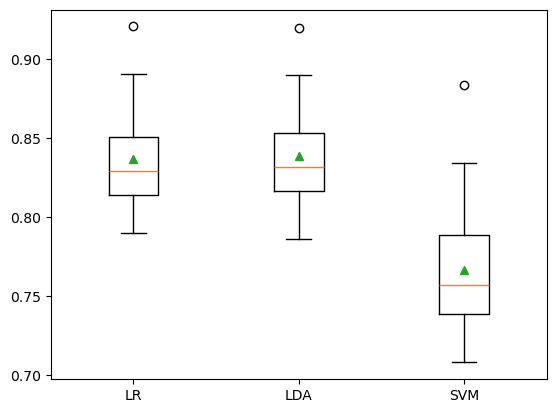

In [89]:
from imblearn.pipeline import Pipeline

def load_data ():
    df = pd.read_csv('/Users/akshayhanchate/Downloads/healthcare-dataset-stroke-data.csv')
    df=df.drop('id', axis=1)
    categorical = [ 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 'smoking_status']
    numerical = ['avg_glucose_level', 'bmi','age']
    y= df['stroke']
    X = df.drop('stroke', axis=1)
    return X,y,categorical, numerical


def evaluate_model(X, y, model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    return scores

def get_models():
    models, names = list(), list()
    models.append(LogisticRegression(solver='liblinear'))    
    names.append('LR')
    models.append(LinearDiscriminantAnalysis())
    names.append('LDA')
    models.append(SVC(gamma='scale'))
    names.append('SVM')
    return models, names


X,y,categorical, numerical= load_data()
print(X.shape, y.shape)

models, names = get_models()
results = list()

for i in range(len(models)):
    transformer = ColumnTransformer(transformers=[('imp',SimpleImputer(strategy='median'),numerical),('o',OneHotEncoder(),categorical)])
    pipeline = Pipeline(steps=[('t', transformer),('p',PowerTransformer(method='yeo-johnson', standardize=True)),('over', SMOTE()), ('m', models[i])])    
    scores = evaluate_model(X, y, pipeline)
    results.append(scores)
    print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))
# plot the results
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

As previously mentioned, our dataset suffers from class imbalance, with the majority class (no stroke) dominating the examples. To address this issue, we employed the stratified method to ensure that the proportions of both classes (stroke and no stroke) are balanced, with 5% representing strokes and 95% representing no strokes. Additionally, we utilized the Synthetic Minority Oversampling Technique (SMOTE), which addresses imbalanced data by generating synthetic instances of the minority class (stroke) based on the k nearest neighbors. In our second model, we applied SMOTE to increase the representation of the minority class to match that of the majority class.
The results revealed a significant improvement in SVM performance, with the accuracy score rising from 0.649 to 0.76. While there were only minor changes in the accuracy scores of logistic regression (LR) and linear discriminant analysis (LDA), all methods continue to demonstrate proficiency in addressing the classification problem.